In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [12]:
# Import and load the 'fashion_mnist' dataset from TensorFlow
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
# Store the datasets into dictionaries
train_JOSE = {'images': train_images, 'labels': train_labels}
test_JOSE = {'images': test_images, 'labels': test_labels}


In [14]:
# b: Initial Exploration
print("Size of training dataset:", len(train_JOSE['images']))
print("Size of testing dataset:", len(test_JOSE['images']))
print("Image resolution (dimension) of input images:", train_JOSE['images'].shape[1:3])
print("Largest pixel value in the dataset:", np.amax(train_JOSE['images']))


Size of training dataset: 60000
Size of testing dataset: 10000
Image resolution (dimension) of input images: (28, 28)
Largest pixel value in the dataset: 255


In [15]:
#c: Data Pre-preprocessing
# Normalize the pixel values
train_JOSE['images'] = train_JOSE['images'] / 255.0
test_JOSE['images'] = test_JOSE['images'] / 255.0

# One-hot encode the labels
train_JOSE['labels'] = to_categorical(train_JOSE['labels'])
test_JOSE['labels'] = to_categorical(test_JOSE['labels'])

# Display the shape of the labels
print("Shape of train_JOSE['labels']:", train_JOSE['labels'].shape)
print("Shape of test_JOSE['labels']:", test_JOSE['labels'].shape)


Shape of train_JOSE['labels']: (60000, 10)
Shape of test_JOSE['labels']: (10000, 10)


In [16]:
test_JOSE['images'], test_JOSE['labels']

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


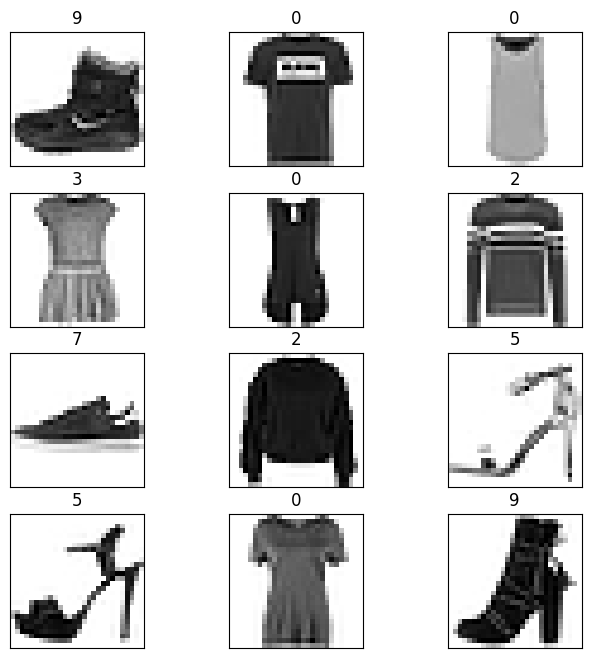

In [17]:
#d: Visualization
# Function to display an image with its label
def plot_image(image, label):
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(np.argmax(label))
    plt.xticks([])
    plt.yticks([])

# Plot the first 12 data samples
plt.figure(figsize=(8, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plot_image(train_JOSE['images'][i], train_JOSE['labels'][i])
plt.show()

In [18]:
#e: Training Data Preparation
# Split the training dataset
x_train_JOSE, x_val_JOSE, y_train_JOSE, y_val_JOSE = train_test_split(
    train_JOSE['images'], train_JOSE['labels'], test_size=0.2, random_state=69)


In [19]:
#f: Build, Train, and Validate CNN Model
# Building the CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0

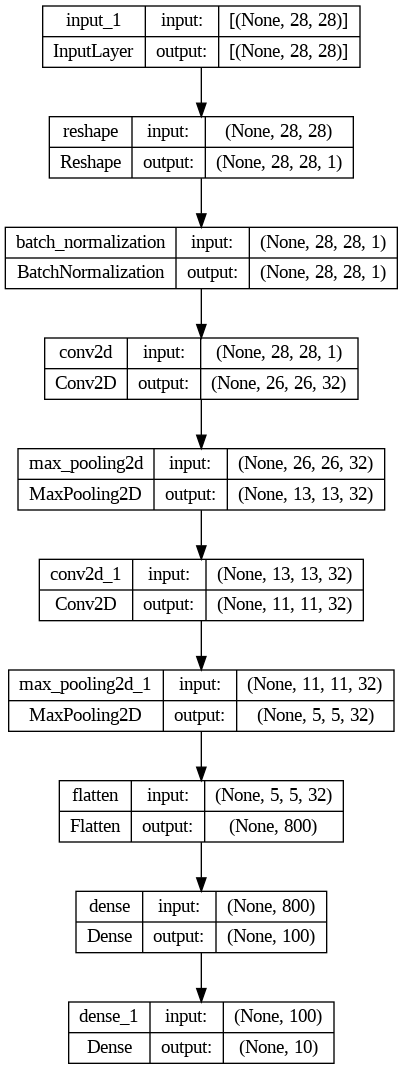

In [20]:
plot_model(cnn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [21]:
# Train and validate the model
train_history = cnn_model.fit(x_train_JOSE, y_train_JOSE, batch_size=256,
                          validation_data=(x_val_JOSE, y_val_JOSE), epochs=10)


Epoch 1/10
188/188 [==============================] - 24s 122ms/step - loss: 0.6486 - accuracy: 0.7706 - val_loss: 0.4990 - val_accuracy: 0.8382
Epoch 2/10
188/188 [==============================] - 19s 101ms/step - loss: 0.3905 - accuracy: 0.8581 - val_loss: 0.3890 - val_accuracy: 0.8578
Epoch 3/10
188/188 [==============================] - 19s 103ms/step - loss: 0.3418 - accuracy: 0.8756 - val_loss: 0.3338 - val_accuracy: 0.8832
Epoch 4/10
188/188 [==============================] - 19s 102ms/step - loss: 0.3133 - accuracy: 0.8867 - val_loss: 0.3328 - val_accuracy: 0.8800
Epoch 5/10
188/188 [==============================] - 20s 105ms/step - loss: 0.2922 - accuracy: 0.8940 - val_loss: 0.3326 - val_accuracy: 0.8792
Epoch 6/10
188/188 [==============================] - 19s 100ms/step - loss: 0.2751 - accuracy: 0.9003 - val_loss: 0.3062 - val_accuracy: 0.8903
Epoch 7/10
188/188 [==============================] - 19s 102ms/step - loss: 0.2632 - accuracy: 0.9035 - val_loss: 0.3038 - val_ac

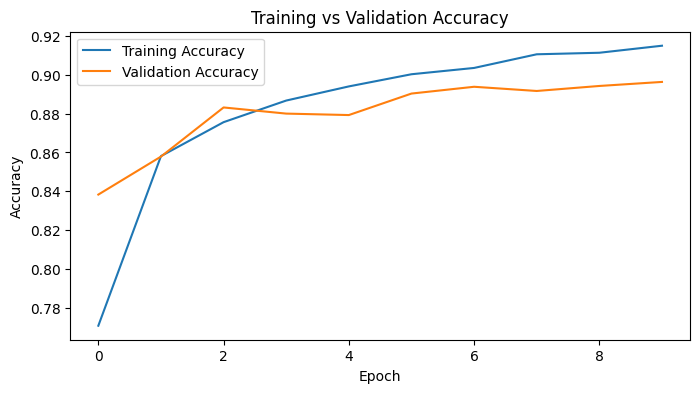

313/313 [==============================] - 1s 4ms/step - loss: 0.3025 - accuracy: 0.8914
Test accuracy: 0.8913999795913696


In [22]:
# g: Test and analyze the model ---
# Plotting Training Vs Validation Accuracy
plt.figure(figsize=(8, 4))
plt.plot(train_history.history['accuracy'], label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model with test data
test_loss, test_accuracy = cnn_model.evaluate(test_JOSE['images'], test_JOSE['labels'])
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 4ms/step


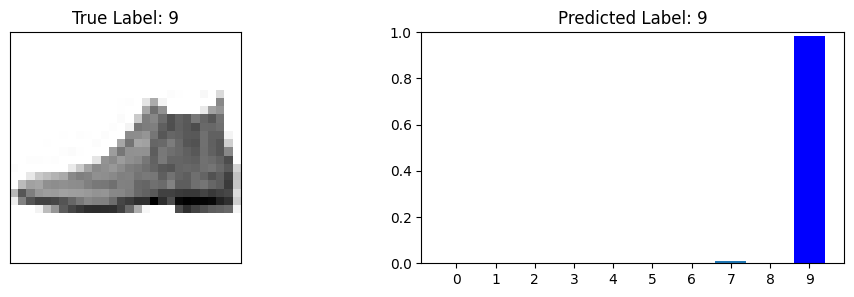

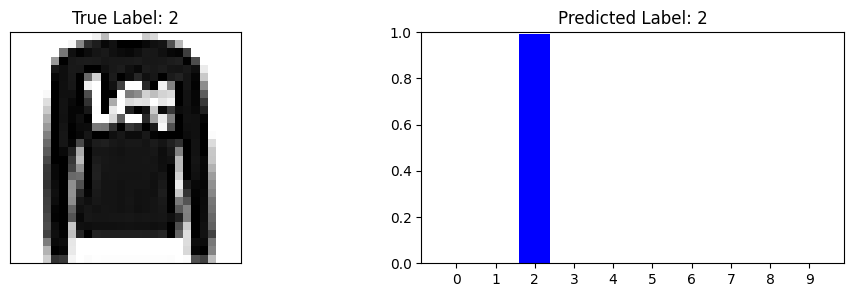

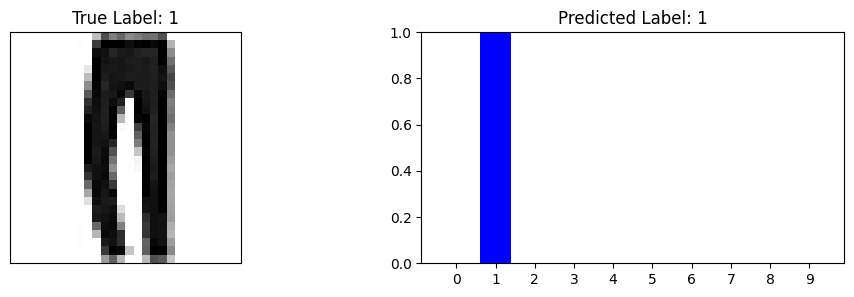

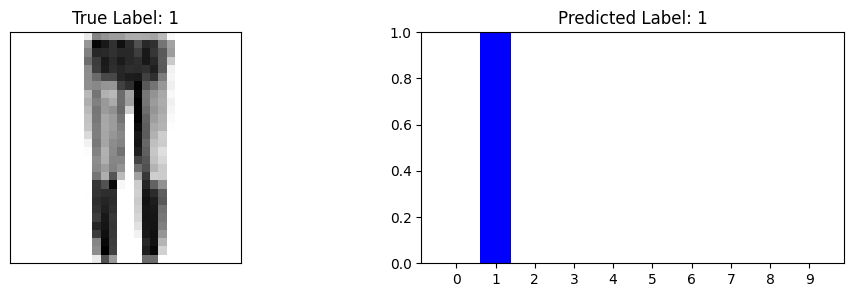

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.73      0.80      1000
           3       0.92      0.89      0.90      1000
           4       0.74      0.91      0.82      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.72      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



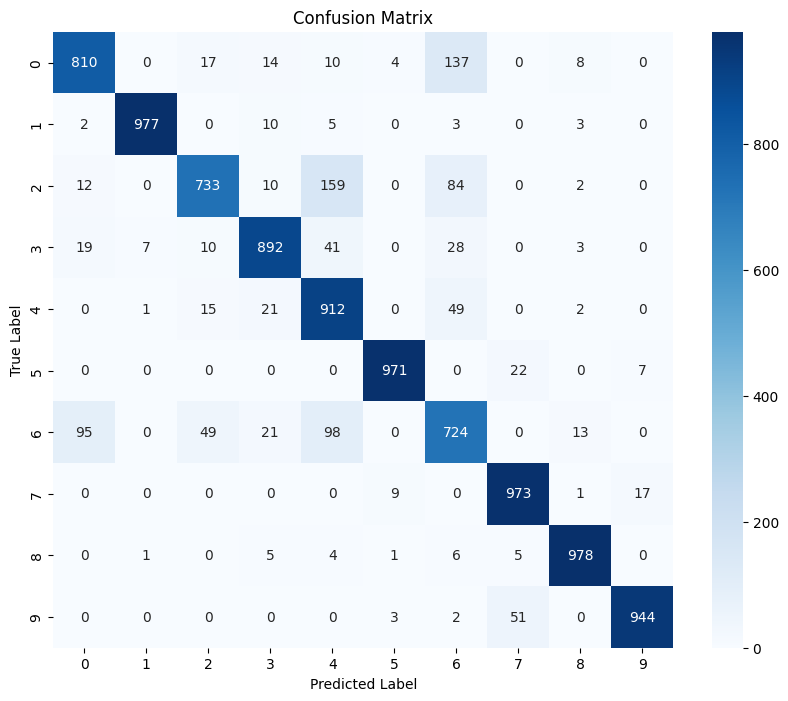

In [23]:
# Evaluate using test data
#Reshape test images for prediction
test_images_reshaped = test_JOSE['images'].reshape(-1, 28, 28, 1)

# Save the CNN model
cnn_model.save('rnn_model.h5')

# Create predictions on the test dataset
predictions = cnn_model.predict(test_images_reshaped)

# Function to plot prediction distribution
def plot_prediction_distribution(image, true_label, prediction):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'True Label: {np.argmax(true_label)}')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction)
    plt.xticks(range(10))
    plt.ylim([0, 1])
    true_label_index = np.argmax(true_label)
    predicted_label_index = np.argmax(prediction)
    plt.bar(true_label_index, prediction[true_label_index], color='green')
    plt.bar(predicted_label_index, prediction[predicted_label_index], color='blue')
    plt.title(f'Predicted Label: {predicted_label_index}')
    plt.show()


for i in range(4):
    plot_prediction_distribution(test_JOSE['images'][i], test_JOSE['labels'][i], predictions[i])

# Convert predictions to label indices
predicted_labels = [np.argmax(p) for p in predictions]
true_labels = [np.argmax(l) for l in test_JOSE['labels']]

# Print classification report
print(classification_report(true_labels, predicted_labels))

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




The model present a good prediction for the mayorities label. (diagonal line)

---
The level number 6 show the mayor misclassification. It is often confused with Class 0 , Class 2 , and Class 4 .

---

Class 1 and Class 5  and 7 are the best predicted with very few misclassifications, indicating the model can easily distinguish these items from others.

---




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81674 (319.04 KB)
Trainable params: 81674 (319.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
188/188 [==============================] - 18s 87ms/step - loss: 0.7976 - accuracy: 0.7127 - val_loss: 0.5983 - val_accuracy: 0.7871
Epoch 2/10
188/188 [==============================] - 15s 79ms/step - loss: 0.4833 - accuracy: 0.8243 - val_loss: 0.4594 - val_accuracy: 0.8286
Epoch 3/10
188/188 [==============================] - 15s 79ms/step - loss: 0.4332 - accuracy: 0.8400 - val_loss: 0.4182 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 8ms/step


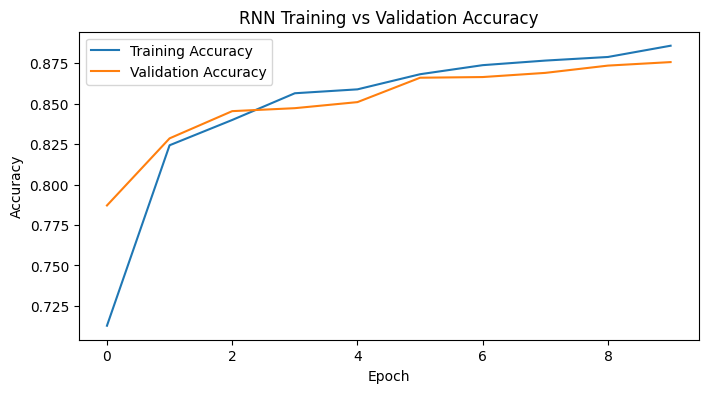

In [24]:
# H : Build,Train,Validate,Test and Analyze RNN Model

# Reshape images for RNN input (considering each row as a timestep)
x_train_rnn = x_train_JOSE.reshape(x_train_JOSE.shape[0], 28, 28)
x_val_rnn = x_val_JOSE.reshape(x_val_JOSE.shape[0], 28, 28)
test_images_rnn = test_JOSE['images'].reshape(test_JOSE['images'].shape[0], 28, 28)

# Building the RNN model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the RNN model
rnn_model.summary()

plot_model(rnn_model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

# Train and validate the RNN model
rnn_history = rnn_model.fit(x_train_rnn, y_train_JOSE, batch_size=256,
                            validation_data=(x_val_rnn, y_val_JOSE), epochs=10)

# Evaluate the RNN model with test data
test_loss_rnn, test_accuracy_rnn = rnn_model.evaluate(test_images_rnn, test_JOSE['labels'])
print("RNN Test accuracy:", test_accuracy_rnn)

# Save the RNN model
rnn_model.save('rnn_model.h5')

# Create predictions on the test dataset using the RNN model
rnn_predictions = rnn_model.predict(test_images_rnn)

# Plotting Training Vs Validation Accuracy for RNN Model
plt.figure(figsize=(8, 4))
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 2s 7ms/step


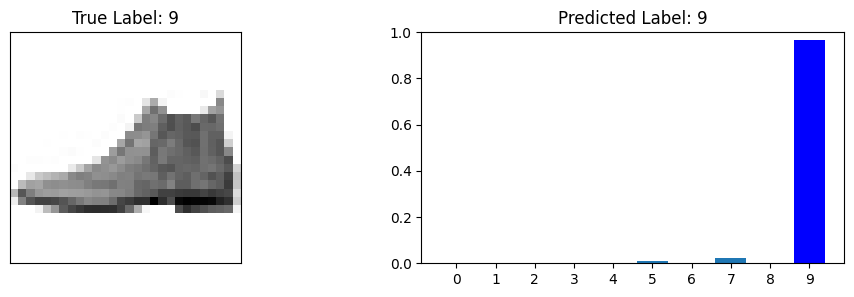

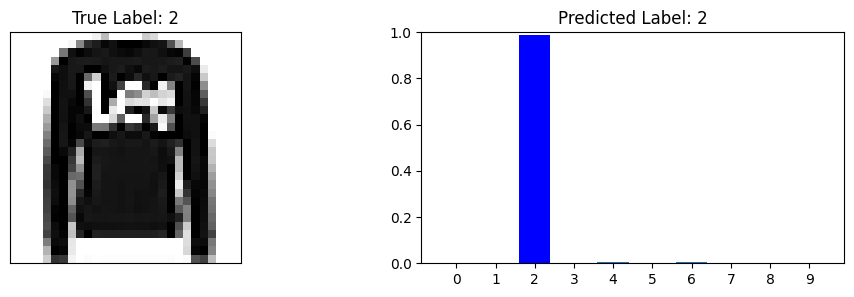

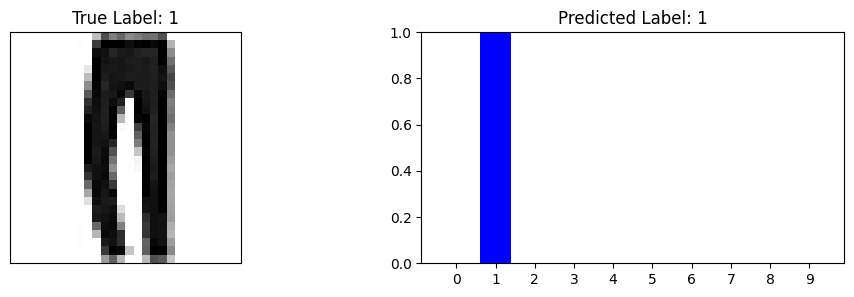

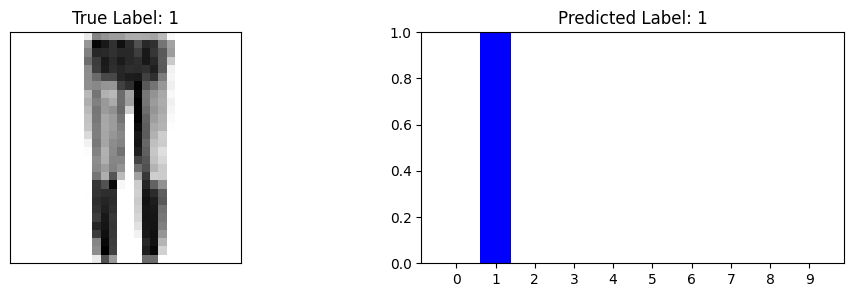

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.82      0.79      1000
           3       0.85      0.90      0.88      1000
           4       0.80      0.81      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.74      0.61      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



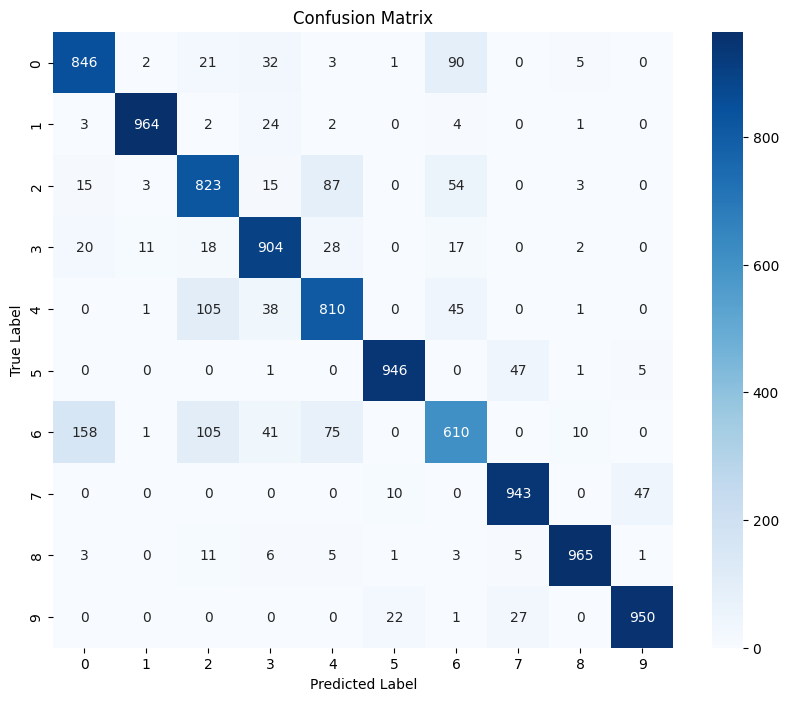

In [25]:
# Create predictions on the test dataset
predictions_rnn = rnn_model.predict(test_images_rnn)

# Function to plot prediction distribution
def plot_prediction_distribution(image, true_label, prediction):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'True Label: {np.argmax(true_label)}')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction)
    plt.xticks(range(10))
    plt.ylim([0, 1])
    true_label_index = np.argmax(true_label)
    predicted_label_index = np.argmax(prediction)
    plt.bar(true_label_index, prediction[true_label_index], color='green')
    plt.bar(predicted_label_index, prediction[predicted_label_index], color='blue')
    plt.title(f'Predicted Label: {predicted_label_index}')
    plt.show()


for i in range(4):
    plot_prediction_distribution(test_JOSE['images'][i], test_JOSE['labels'][i], predictions_rnn[i])

# Convert predictions to label indices
predicted_labels = [np.argmax(p) for p in predictions_rnn]
true_labels = [np.argmax(l) for l in test_JOSE['labels']]

# Print classification report
print(classification_report(true_labels, predicted_labels))

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()